# CSC420 Assignment 3 Question 4

In [1]:
import matplotlib.pyplot as plt
import scipy
import cv2
import numpy as np
import math
from scipy.special import softmax

In [15]:
def get_image(path, coloring=cv2.IMREAD_GRAYSCALE):
    raw_image = cv2.imread(path, coloring)
    # croped_image = np.asarray(cv2.resize(raw_image, (900, 1200), interpolation = cv2.INTER_AREA))
    # plt.imshow(raw_image, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
    # plt.show()
    return raw_image

In [3]:
def get_gradient(image):
    sobelx = np.array(cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3))
    sobely = np.array(cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3))
    gradient = np.array([sobelx, sobely])
    gradient = gradient.transpose(1, 2, 0)
    gradient_magnitude = np.sqrt(sobelx * sobelx + sobely * sobely)
    # plt.imshow(gradient_magnitude, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
    # plt.show()
    return sobelx, sobely, gradient, gradient_magnitude

In [7]:
def get_eigenvalues(det, trace):
    diff = np.sqrt(np.abs(trace * trace - 4 * det ))
    lambda_1 = (trace - diff) / 2
    lambda_2 = (trace + diff) / 2
    eigenvalues = np.array([lambda_1, lambda_2]).transpose(1, 2, 0)
    return lambda_1, lambda_2, eigenvalues

In [ ]:
I1 = get_image('Q4/University_College,_University_of_Toronto.jpg')

In [ ]:
# blur1 = cv2.GaussianBlur(I1,(5,5),7)
Ix, Iy, gradient_1, gradient_magnitude_1 = get_gradient(I1)

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(Ix, cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(Iy, cmap = 'gray')

In [ ]:
Ix.min(), Ix.max(), Iy.min(), Iy.max()

In [ ]:
IxIy = np.multiply(Ix, Iy)
Ix2 = np.multiply(Ix, Ix)
Iy2 = np.multiply(Iy, Iy)
Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10)
Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10)
IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10)

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1), plt.imshow(Ix2_blur,cmap = 'gray')
plt.subplot(1,3,2), plt.imshow(Iy2_blur,cmap = 'gray')
plt.subplot(1,3,3), plt.imshow(IxIy_blur,cmap = 'gray')

In [ ]:
# (\lamda_1 + \lambda_2) and (\lamda_1 * \lambda_2) for the M matrix
det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
trace = Ix2_blur + Iy2_blur

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(det,cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(trace,cmap = 'gray')

In [ ]:
lambda_1, lambda_2, eigenvalues = get_eigenvalues(det, trace)
print(eigenvalues.shape)
print(lambda_1.shape)
print(lambda_2.shape)

In [ ]:
def do_all_the_things(path):
    image = get_image(path)
    # blur = cv2.GaussianBlur(I1,(5,5),7)
    Ix, Iy, gradient_1, gradient_magnitude_1 = get_gradient(I1)
    IxIy = np.multiply(Ix, Iy)
    Ix2 = np.multiply(Ix, Ix)
    Iy2 = np.multiply(Iy, Iy)
    Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10)
    Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10)
    IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10)
    # (\lamda_1 + \lambda_2) and (\lamda_1 * \lambda_2) for the M matrix
    det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
    trace = Ix2_blur + Iy2_blur
    lambda_1, lambda_2, eigenvalues = get_eigenvalues(det, trace)
    corner_threshold_x = 20000
    plt.scatter(lambda_2.flatten(), lambda_1.flatten())
    plt.show()

In [ ]:
do_all_the_things('Q4/University_College,_University_of_Toronto.jpg')

In [ ]:
do_all_the_things('Q4/University_College_Lawn,_University_of_Toronto,_Canada.jpg')

In [32]:
from matplotlib import image as mpimg


def get_corners(path):
    image = get_image(path)
    # blur = cv2.GaussianBlur(I1,(5,5),7)
    Ix, Iy, gradient_1, gradient_magnitude_1 = get_gradient(image)
    IxIy = np.multiply(Ix, Iy)
    Ix2 = np.multiply(Ix, Ix)
    Iy2 = np.multiply(Iy, Iy)
    Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10)
    Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10)
    IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10)
    # (\lamda_1 + \lambda_2) and (\lamda_1 * \lambda_2) for the M matrix
    det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
    trace = Ix2_blur + Iy2_blur
    lambda_1, lambda_2, eigenvalues = get_eigenvalues(det, trace)

    print(lambda_1.max())
    print(lambda_2.max())

    corner_threshold_x = np.percentile(lambda_1, 97)
    corner_threshold_y = np.percentile(lambda_2, 97)
    # corner_threshold_y = 0.2 * lambda_2.max()

    print(corner_threshold_x.max())
    print(corner_threshold_y.max())

    lambda_1_flags = np.where(lambda_1.flatten() > corner_threshold_x)
    lambda_2_flags = np.where(lambda_2.flatten() > corner_threshold_y)

    cap = np.intersect1d(lambda_1_flags, lambda_2_flags)

    x = cap / image.shape[1]
    y = cap % image.shape[1]


    plt.imshow(mpimg.imread(path))
    plt.scatter(y, x, s=0.1)
    plt.show()

88883.123236017
271991.0140063198
5503.795927878075
26476.937778981614


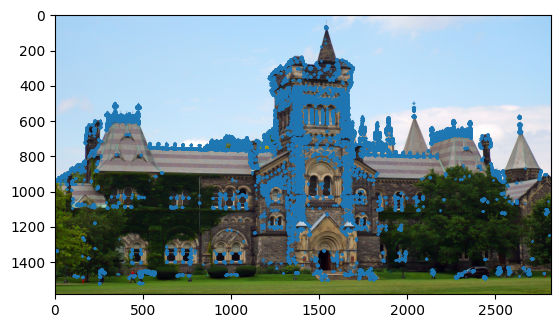

In [28]:
get_corners('Q4/University_College,_University_of_Toronto.jpg')

143613.53106516923
349723.7304754149
17606.915145025385
59375.5571995907


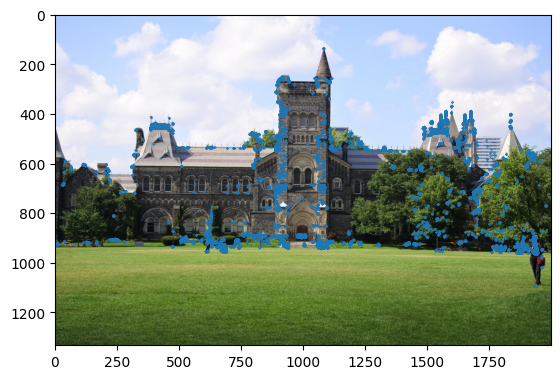

In [33]:
get_corners('Q4/University_College_Lawn,_University_of_Toronto,_Canada.jpg')